## Problem statement 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\AK\Desktop\file\train data.csv")
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
train.drop(train.columns[[0]], axis=1, inplace=True)

In [4]:
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
train["customerscore"]=np.nan
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,NaN
1,F,Flight,4,5,216,2,low,M,59,3088,1,NaN
2,A,Flight,2,2,183,4,low,M,48,3374,1,NaN
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NaN
4,C,Flight,2,2,184,3,medium,F,46,2484,1,NaN


In [8]:
good_rating= train.query('Customer_rating>=3')

In [9]:
print(good_rating)

      Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
1                   F           Flight                    4                5   
3                   B           Flight                    3                3   
6                   D           Flight                    3                4   
8                   A           Flight                    3                4   
10                  C           Flight                    3                4   
...               ...              ...                  ...              ...   
10987               F             Ship                    5                3   
10988               A             Ship                    4                3   
10990               C             Ship                    5                4   
10996               C             Ship                    5                4   
10998               D             Ship                    2                5   

       Cost_of_the_Product  Prior_purch

In [17]:
train['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100

Reached.on.Time_Y.N
1    59.669061
0    40.330939
Name: proportion, dtype: float64

Reached.on.Time_Y.N
1    3977
0    2622
Name: count, dtype: int64


Reached.on.Time_Y.N
1    60.266707
0    39.733293
Name: proportion, dtype: float64

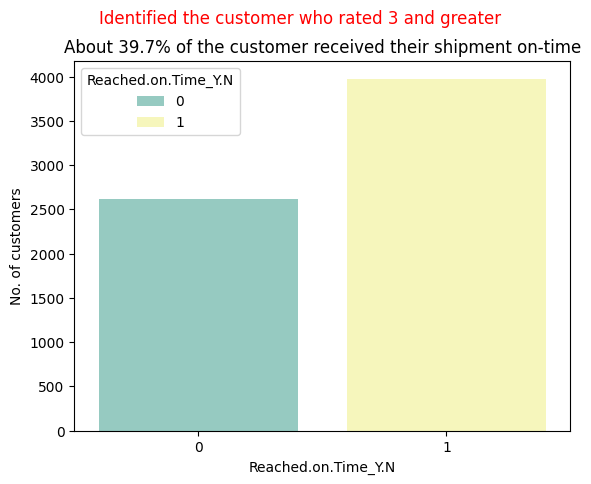

In [18]:
import seaborn as sns
ax =sns.countplot(x="Reached.on.Time_Y.N",data=good_rating, palette="Set3",hue="Reached.on.Time_Y.N")
plt.ylabel("No. of customers")
plt.title("About 39.7% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.4, 4600, 'Identified the customer who rated 3 and greater',fontsize=12,color='red')

count=good_rating['Reached.on.Time_Y.N'].value_counts()
print(count)
#ax.text(0, 4600, count,fontsize=12,horizontalalignment='center')
good_rating['Reached.on.Time_Y.N'].value_counts(normalize=True)*100

In [19]:
totalcost = train['Cost_of_the_Product'].sum()
print (totalcost)

2311955


In [21]:
countorder=train['Cost_of_the_Product'].count()
print(countorder)

10999


In [22]:
avg=totalcost/countorder
print(avg)


210.19683607600692


In [24]:
a=[]
for value in train['Prior_purchases']: 
    a.append(avg*value)
train['customerscore']=a
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,630.590508
1,F,Flight,4,5,216,2,low,M,59,3088,1,420.393672
2,A,Flight,2,2,183,4,low,M,48,3374,1,840.787344
3,B,Flight,3,3,176,4,medium,M,10,1177,1,840.787344
4,C,Flight,2,2,184,3,medium,F,46,2484,1,630.590508


In [26]:
train['customerscore'].median()

630.5905082280208

In [27]:
goodscore=train.query('customerscore>=630')

Reached.on.Time_Y.N
1    4938
0    3462
Name: count, dtype: int64


Reached.on.Time_Y.N
1    58.785714
0    41.214286
Name: proportion, dtype: float64

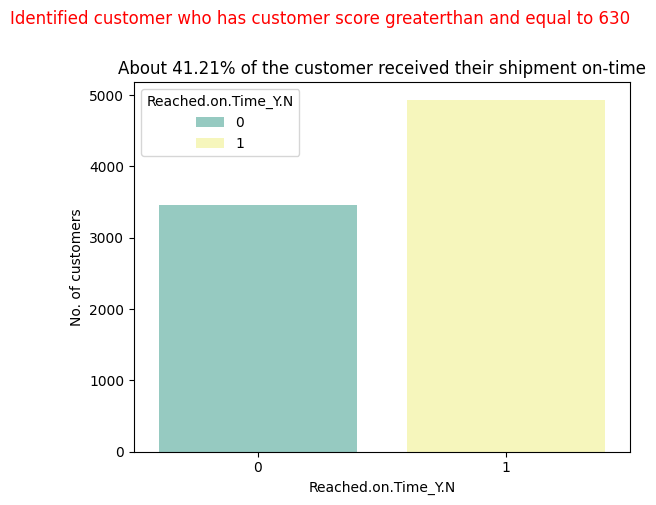

In [28]:
ax = sns.countplot(x="Reached.on.Time_Y.N",data=goodscore, palette="Set3",hue="Reached.on.Time_Y.N")
plt.ylabel("No. of customers")
plt.title("About 41.21% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-1, 6000, 'Identified customer who has customer score greaterthan and equal to 630',fontsize=12,color='red')
count1=goodscore['Reached.on.Time_Y.N'].value_counts()
print(count1)
goodscore['Reached.on.Time_Y.N'].value_counts(normalize=True)*100

In [29]:
recurringorder=train.query('Prior_purchases>=6')
recurringorder

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
37,F,Ship,2,4,181,6,medium,F,16,3605,1,1261.181016
62,A,Ship,5,1,105,6,medium,M,62,1292,1,1261.181016
74,A,Ship,6,1,238,6,low,F,13,2442,1,1261.181016
90,D,Ship,5,3,174,6,high,F,41,1085,1,1261.181016
133,F,Flight,5,4,280,6,medium,F,51,3582,1,1261.181016
...,...,...,...,...,...,...,...,...,...,...,...,...
10981,F,Ship,5,2,251,6,low,M,10,1196,0,1261.181016
10983,B,Ship,4,3,229,6,medium,M,1,1235,1,1261.181016
10990,C,Ship,5,4,219,6,low,M,3,1098,0,1261.181016
10993,F,Ship,5,1,257,6,low,F,1,1150,0,1261.181016


Reached.on.Time_Y.N
1    591
0    412
Name: count, dtype: int64


Reached.on.Time_Y.N
1    58.92323
0    41.07677
Name: proportion, dtype: float64

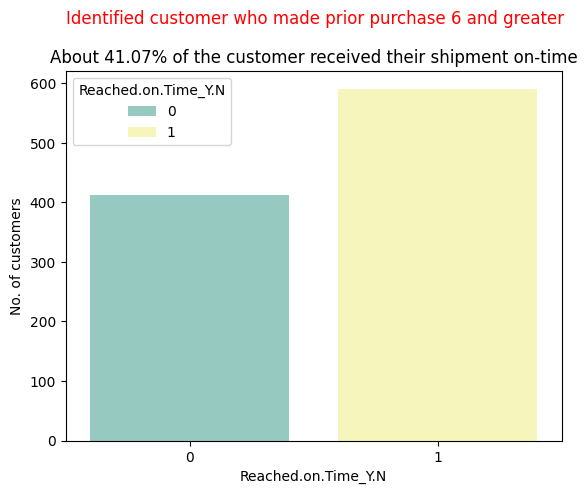

In [30]:
ax = sns.countplot(x="Reached.on.Time_Y.N",data=recurringorder, palette="Set3",hue="Reached.on.Time_Y.N")
plt.ylabel("No. of customers")
plt.title("About 41.07% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.5, 700, 'Identified customer who made prior purchase 6 and greater',fontsize=12,color='red')
count2=recurringorder['Reached.on.Time_Y.N'].value_counts()
print(count2)
recurringorder['Reached.on.Time_Y.N'].value_counts(normalize=True)*100

In [31]:
train["Cost_of_the_Product"].max()

310

In [32]:
train["Cost_of_the_Product"].min()

96

In [33]:
medianvalue=train["Cost_of_the_Product"].median()

In [34]:
print(medianvalue)

214.0


In [35]:
higestpayment=train.query('Cost_of_the_Product>=214')

Reached.on.Time_Y.N
1    3136
0    2408
Name: count, dtype: int64


Reached.on.Time_Y.N
1    56.565657
0    43.434343
Name: proportion, dtype: float64

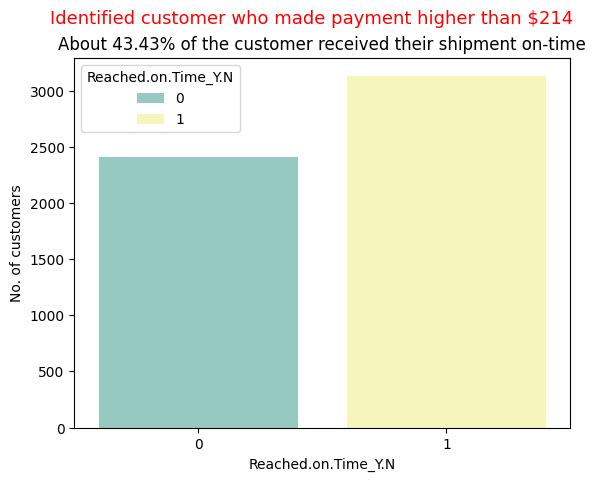

In [36]:
ax = sns.countplot(x="Reached.on.Time_Y.N",data=higestpayment, palette="Set3",hue="Reached.on.Time_Y.N")
plt.ylabel("No. of customers")
plt.title("About 43.43% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.6, 3600, 'Identified customer who made payment higher than $214',fontsize=13,color='red')
count3=higestpayment['Reached.on.Time_Y.N'].value_counts()
print(count3)
higestpayment['Reached.on.Time_Y.N'].value_counts(normalize=True)*100

In [37]:
mostvaluablecustomer=train[(train['Customer_rating'] >= 3)&(train['Prior_purchases']>=6)&(train['Cost_of_the_Product']>=214)&(train['customerscore']>=train['customerscore'].median())]

Reached.on.Time_Y.N
1    172
0    156
Name: count, dtype: int64


Reached.on.Time_Y.N
1    52.439024
0    47.560976
Name: proportion, dtype: float64

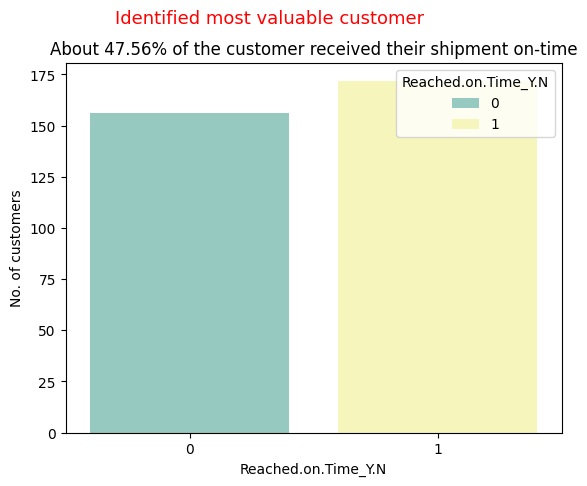

In [38]:
ax = sns.countplot(x="Reached.on.Time_Y.N",data=mostvaluablecustomer, palette="Set3",hue="Reached.on.Time_Y.N")
plt.ylabel("No. of customers")
plt.title("About 47.56% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.3, 200, 'Identified most valuable customer',fontsize=13,color='red')
count4=mostvaluablecustomer['Reached.on.Time_Y.N'].value_counts()
print(count4)
mostvaluablecustomer['Reached.on.Time_Y.N'].value_counts(normalize=True)*100